In [8]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [9]:
encoding_dim = 64

In [23]:
input_img = Input(shape=(784,))
encoded = Dense(256, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded) #bottleneck

decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(256, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

encoder = Model(input_img, encoded)

encoded_input = Input(shape=(encoding_dim,))

decoder_layer = autoencoder.layers[-3](encoded_input)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)

decoder = Model(encoded_input, decoder_layer)

In [24]:
autoencoder.compile(optimizer='adadelta', loss = 'binary_crossentropy')

# Load mnist dataset

In [25]:
(x_train, _),(x_test, _) = mnist.load_data()

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = x_train.reshape((len(x_train), (np.prod(x_train.shape[1:]))))
x_test = x_test.reshape((len(x_test), (np.prod(x_test.shape[1:]))))

print(f'x_train shape = {x_train.shape}')
print(f'x_test shape = {x_test.shape}')

x_train shape = (60000, 784)
x_test shape = (10000, 784)


# Fit data

In [26]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True,
               validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 74us/step - loss: 0.3210 - val_loss: 0.2594
Epoch 2/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.2452 - val_loss: 0.2316
Epoch 3/50
60000/60000 [==============================] - 4s 62us/step - loss: 0.2148 - val_loss: 0.2020
Epoch 4/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.1932 - val_loss: 0.1868
Epoch 5/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.1802 - val_loss: 0.1742
Epoch 6/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.1703 - val_loss: 0.1634
Epoch 7/50
60000/60000 [==============================] - 4s 68us/step - loss: 0.1622 - val_loss: 0.1569
Epoch 8/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.1561 - val_loss: 0.1518
Epoch 9/50
60000/60000 [==============================] - 4s 73us/step - loss: 0.1512 - val_loss: 0.1474
Epoch

In [27]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

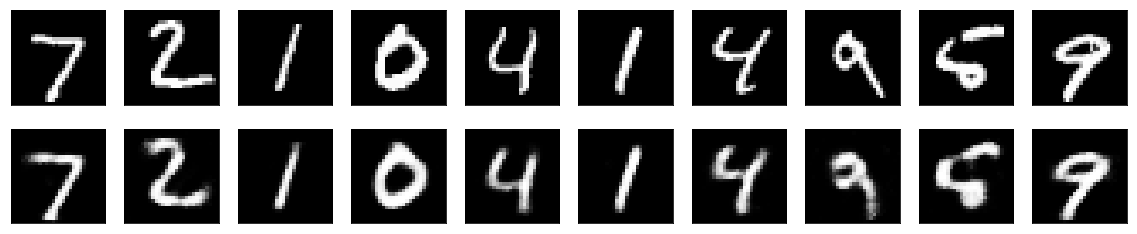

In [28]:
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()